<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 1.0003393	total: 63.3ms	remaining: 1m 3s
1:	learn: 0.9794276	total: 66.4ms	remaining: 33.1s
2:	learn: 0.9580929	total: 69ms	remaining: 22.9s
3:	learn: 0.9404170	total: 77.6ms	remaining: 19.3s
4:	learn: 0.9240770	total: 80.8ms	remaining: 16.1s
5:	learn: 0.9046934	total: 83.6ms	remaining: 13.9s
6:	learn: 0.8861435	total: 89.1ms	remaining: 12.6s
7:	learn: 0.8684515	total: 91.7ms	remaining: 11.4s
8:	learn: 0.8512064	total: 94ms	remaining: 10.3s
9:	learn: 0.8337259	total: 96.3ms	remaining: 9.54s
10:	learn: 0.8186915	total: 98.7ms	remaining: 8.87s
11:	learn: 0.8030358	total: 101ms	remaining: 8.34s
12:	learn: 0.7867911	total: 104ms	remaining: 7.86s
13:	learn: 0.7710048	total: 106ms	remaining: 7.47s
14:	learn: 0.7580908	total: 110ms	remaining: 7.2s
15:	learn: 0.7422866	total: 115ms	remaining: 7.08s
16:	learn: 0.7282810	total: 119ms	remaining: 6.86s
17:	learn: 0.7143535	total: 129ms	remaining: 7.03s
18:	learn: 0.7015697	total: 131ms	remaining: 6.78s
19:	learn: 0.6888681	total: 134ms	r

34:	learn: 0.5448536	total: 181ms	remaining: 5s
35:	learn: 0.5378277	total: 184ms	remaining: 4.93s
36:	learn: 0.5312199	total: 187ms	remaining: 4.86s
37:	learn: 0.5241608	total: 189ms	remaining: 4.79s
38:	learn: 0.5169252	total: 190ms	remaining: 4.69s
39:	learn: 0.5085255	total: 193ms	remaining: 4.63s
40:	learn: 0.5032648	total: 196ms	remaining: 4.58s
41:	learn: 0.4959756	total: 199ms	remaining: 4.54s
42:	learn: 0.4916475	total: 201ms	remaining: 4.47s
43:	learn: 0.4847239	total: 204ms	remaining: 4.44s
44:	learn: 0.4791450	total: 207ms	remaining: 4.39s
45:	learn: 0.4746548	total: 209ms	remaining: 4.33s
46:	learn: 0.4694303	total: 211ms	remaining: 4.28s
47:	learn: 0.4634403	total: 213ms	remaining: 4.23s
48:	learn: 0.4588230	total: 216ms	remaining: 4.19s
49:	learn: 0.4527979	total: 219ms	remaining: 4.15s
50:	learn: 0.4472620	total: 221ms	remaining: 4.11s
51:	learn: 0.4428202	total: 223ms	remaining: 4.07s
52:	learn: 0.4379844	total: 226ms	remaining: 4.03s
53:	learn: 0.4318073	total: 228ms	

54:	learn: 0.4267096	total: 232ms	remaining: 3.99s
55:	learn: 0.4224087	total: 236ms	remaining: 3.98s
56:	learn: 0.4189920	total: 239ms	remaining: 3.96s
57:	learn: 0.4144138	total: 241ms	remaining: 3.92s
58:	learn: 0.4103694	total: 244ms	remaining: 3.9s
59:	learn: 0.4064009	total: 247ms	remaining: 3.87s
60:	learn: 0.4031700	total: 249ms	remaining: 3.84s
61:	learn: 0.3988180	total: 252ms	remaining: 3.81s
62:	learn: 0.3940374	total: 254ms	remaining: 3.78s
63:	learn: 0.3901754	total: 257ms	remaining: 3.75s
64:	learn: 0.3869195	total: 259ms	remaining: 3.73s
65:	learn: 0.3839214	total: 261ms	remaining: 3.7s
66:	learn: 0.3810545	total: 264ms	remaining: 3.67s
67:	learn: 0.3776521	total: 266ms	remaining: 3.65s
68:	learn: 0.3748744	total: 268ms	remaining: 3.62s
69:	learn: 0.3711339	total: 271ms	remaining: 3.6s
70:	learn: 0.3673483	total: 273ms	remaining: 3.57s
71:	learn: 0.3633834	total: 275ms	remaining: 3.55s
72:	learn: 0.3595002	total: 280ms	remaining: 3.55s
73:	learn: 0.3568655	total: 283ms	

96:	learn: 0.3047403	total: 374ms	remaining: 3.49s
97:	learn: 0.3032175	total: 379ms	remaining: 3.49s
98:	learn: 0.3018362	total: 384ms	remaining: 3.49s
99:	learn: 0.3002261	total: 388ms	remaining: 3.49s
100:	learn: 0.2988144	total: 391ms	remaining: 3.48s
101:	learn: 0.2973214	total: 393ms	remaining: 3.46s
102:	learn: 0.2957964	total: 396ms	remaining: 3.45s
103:	learn: 0.2947045	total: 398ms	remaining: 3.43s


104:	learn: 0.2937351	total: 401ms	remaining: 3.41s
105:	learn: 0.2922812	total: 403ms	remaining: 3.4s
106:	learn: 0.2906310	total: 405ms	remaining: 3.38s
107:	learn: 0.2897395	total: 408ms	remaining: 3.37s
108:	learn: 0.2886811	total: 410ms	remaining: 3.35s
109:	learn: 0.2869636	total: 413ms	remaining: 3.34s
110:	learn: 0.2855590	total: 415ms	remaining: 3.33s
111:	learn: 0.2843822	total: 418ms	remaining: 3.31s
112:	learn: 0.2829642	total: 419ms	remaining: 3.29s
113:	learn: 0.2819234	total: 422ms	remaining: 3.28s
114:	learn: 0.2808237	total: 424ms	remaining: 3.26s
115:	learn: 0.2797119	total: 426ms	remaining: 3.25s
116:	learn: 0.2782876	total: 429ms	remaining: 3.24s
117:	learn: 0.2771883	total: 431ms	remaining: 3.22s
118:	learn: 0.2764810	total: 434ms	remaining: 3.21s
119:	learn: 0.2754663	total: 436ms	remaining: 3.2s
120:	learn: 0.2739520	total: 438ms	remaining: 3.18s
121:	learn: 0.2728370	total: 441ms	remaining: 3.17s
122:	learn: 0.2712290	total: 443ms	remaining: 3.16s
123:	learn: 0.

157:	learn: 0.2416695	total: 533ms	remaining: 2.84s
158:	learn: 0.2406647	total: 535ms	remaining: 2.83s
159:	learn: 0.2404942	total: 536ms	remaining: 2.81s
160:	learn: 0.2402792	total: 539ms	remaining: 2.81s
161:	learn: 0.2397416	total: 542ms	remaining: 2.8s
162:	learn: 0.2389930	total: 544ms	remaining: 2.79s
163:	learn: 0.2380245	total: 547ms	remaining: 2.79s
164:	learn: 0.2373482	total: 549ms	remaining: 2.78s
165:	learn: 0.2367379	total: 551ms	remaining: 2.77s
166:	learn: 0.2358386	total: 554ms	remaining: 2.76s
167:	learn: 0.2351027	total: 556ms	remaining: 2.75s
168:	learn: 0.2343520	total: 559ms	remaining: 2.75s


169:	learn: 0.2339790	total: 564ms	remaining: 2.75s
170:	learn: 0.2330262	total: 569ms	remaining: 2.76s
171:	learn: 0.2320259	total: 572ms	remaining: 2.75s
172:	learn: 0.2315040	total: 578ms	remaining: 2.76s
173:	learn: 0.2311808	total: 605ms	remaining: 2.87s
174:	learn: 0.2305609	total: 607ms	remaining: 2.86s
175:	learn: 0.2299791	total: 615ms	remaining: 2.88s
176:	learn: 0.2293427	total: 618ms	remaining: 2.87s
177:	learn: 0.2288712	total: 621ms	remaining: 2.87s
178:	learn: 0.2281661	total: 624ms	remaining: 2.86s
179:	learn: 0.2276543	total: 626ms	remaining: 2.85s
180:	learn: 0.2270775	total: 628ms	remaining: 2.84s
181:	learn: 0.2265015	total: 631ms	remaining: 2.84s
182:	learn: 0.2262385	total: 634ms	remaining: 2.83s
183:	learn: 0.2256412	total: 636ms	remaining: 2.82s
184:	learn: 0.2251700	total: 638ms	remaining: 2.81s
185:	learn: 0.2244538	total: 640ms	remaining: 2.8s
186:	learn: 0.2241891	total: 643ms	remaining: 2.79s
187:	learn: 0.2240705	total: 644ms	remaining: 2.78s
188:	learn: 0

197:	learn: 0.2182146	total: 670ms	remaining: 2.71s
198:	learn: 0.2174087	total: 673ms	remaining: 2.71s
199:	learn: 0.2169903	total: 676ms	remaining: 2.7s
200:	learn: 0.2162231	total: 678ms	remaining: 2.7s
201:	learn: 0.2157896	total: 681ms	remaining: 2.69s
202:	learn: 0.2154476	total: 684ms	remaining: 2.68s
203:	learn: 0.2149288	total: 686ms	remaining: 2.68s
204:	learn: 0.2143884	total: 689ms	remaining: 2.67s
205:	learn: 0.2137066	total: 691ms	remaining: 2.66s
206:	learn: 0.2132918	total: 694ms	remaining: 2.66s
207:	learn: 0.2128432	total: 697ms	remaining: 2.65s
208:	learn: 0.2119147	total: 700ms	remaining: 2.65s
209:	learn: 0.2112998	total: 703ms	remaining: 2.65s


210:	learn: 0.2107267	total: 709ms	remaining: 2.65s
211:	learn: 0.2101801	total: 712ms	remaining: 2.65s
212:	learn: 0.2098604	total: 716ms	remaining: 2.65s
213:	learn: 0.2097136	total: 725ms	remaining: 2.66s
214:	learn: 0.2090291	total: 728ms	remaining: 2.66s
215:	learn: 0.2083993	total: 730ms	remaining: 2.65s
216:	learn: 0.2082489	total: 733ms	remaining: 2.64s
217:	learn: 0.2076424	total: 736ms	remaining: 2.64s
218:	learn: 0.2073395	total: 738ms	remaining: 2.63s
219:	learn: 0.2065398	total: 740ms	remaining: 2.63s
220:	learn: 0.2063222	total: 743ms	remaining: 2.62s
221:	learn: 0.2058475	total: 745ms	remaining: 2.61s
222:	learn: 0.2051583	total: 748ms	remaining: 2.6s
223:	learn: 0.2049762	total: 750ms	remaining: 2.6s
224:	learn: 0.2044530	total: 753ms	remaining: 2.59s
225:	learn: 0.2037621	total: 755ms	remaining: 2.58s
226:	learn: 0.2030158	total: 758ms	remaining: 2.58s
227:	learn: 0.2025479	total: 761ms	remaining: 2.58s
228:	learn: 0.2021748	total: 765ms	remaining: 2.58s
229:	learn: 0.

255:	learn: 0.1902239	total: 838ms	remaining: 2.44s
256:	learn: 0.1896906	total: 841ms	remaining: 2.43s
257:	learn: 0.1892722	total: 843ms	remaining: 2.42s
258:	learn: 0.1888709	total: 846ms	remaining: 2.42s
259:	learn: 0.1885745	total: 848ms	remaining: 2.41s
260:	learn: 0.1879308	total: 850ms	remaining: 2.41s
261:	learn: 0.1875727	total: 853ms	remaining: 2.4s
262:	learn: 0.1870246	total: 857ms	remaining: 2.4s


263:	learn: 0.1865049	total: 877ms	remaining: 2.44s
264:	learn: 0.1860176	total: 881ms	remaining: 2.44s
265:	learn: 0.1855685	total: 884ms	remaining: 2.44s
266:	learn: 0.1848839	total: 886ms	remaining: 2.43s
267:	learn: 0.1842782	total: 889ms	remaining: 2.43s
268:	learn: 0.1840904	total: 891ms	remaining: 2.42s
269:	learn: 0.1837133	total: 893ms	remaining: 2.42s
270:	learn: 0.1835963	total: 896ms	remaining: 2.41s
271:	learn: 0.1831292	total: 898ms	remaining: 2.4s
272:	learn: 0.1824546	total: 903ms	remaining: 2.4s
273:	learn: 0.1820761	total: 908ms	remaining: 2.41s
274:	learn: 0.1818527	total: 912ms	remaining: 2.4s
275:	learn: 0.1812572	total: 914ms	remaining: 2.4s
276:	learn: 0.1811563	total: 916ms	remaining: 2.39s
277:	learn: 0.1810445	total: 919ms	remaining: 2.38s
278:	learn: 0.1804058	total: 921ms	remaining: 2.38s
279:	learn: 0.1799667	total: 924ms	remaining: 2.38s
280:	learn: 0.1798484	total: 926ms	remaining: 2.37s
281:	learn: 0.1793923	total: 929ms	remaining: 2.36s
282:	learn: 0.17

307:	learn: 0.1709857	total: 1s	remaining: 2.26s
308:	learn: 0.1708802	total: 1.01s	remaining: 2.25s
309:	learn: 0.1705436	total: 1.01s	remaining: 2.25s
310:	learn: 0.1700347	total: 1.01s	remaining: 2.24s
311:	learn: 0.1696255	total: 1.01s	remaining: 2.24s
312:	learn: 0.1695133	total: 1.02s	remaining: 2.23s
313:	learn: 0.1693721	total: 1.02s	remaining: 2.23s
314:	learn: 0.1693071	total: 1.02s	remaining: 2.22s
315:	learn: 0.1689525	total: 1.02s	remaining: 2.21s
316:	learn: 0.1684850	total: 1.03s	remaining: 2.21s
317:	learn: 0.1681293	total: 1.03s	remaining: 2.21s
318:	learn: 0.1676834	total: 1.03s	remaining: 2.2s
319:	learn: 0.1675498	total: 1.03s	remaining: 2.19s
320:	learn: 0.1674668	total: 1.03s	remaining: 2.19s
321:	learn: 0.1673144	total: 1.04s	remaining: 2.18s
322:	learn: 0.1670131	total: 1.04s	remaining: 2.18s
323:	learn: 0.1666039	total: 1.04s	remaining: 2.17s


324:	learn: 0.1663221	total: 1.04s	remaining: 2.17s
325:	learn: 0.1660176	total: 1.05s	remaining: 2.16s
326:	learn: 0.1656379	total: 1.05s	remaining: 2.16s
327:	learn: 0.1653481	total: 1.05s	remaining: 2.15s
328:	learn: 0.1650166	total: 1.05s	remaining: 2.15s
329:	learn: 0.1648930	total: 1.06s	remaining: 2.14s
330:	learn: 0.1645493	total: 1.06s	remaining: 2.14s
331:	learn: 0.1640556	total: 1.06s	remaining: 2.13s
332:	learn: 0.1635124	total: 1.06s	remaining: 2.13s
333:	learn: 0.1632153	total: 1.06s	remaining: 2.12s
334:	learn: 0.1628775	total: 1.07s	remaining: 2.12s
335:	learn: 0.1628086	total: 1.07s	remaining: 2.11s
336:	learn: 0.1625758	total: 1.07s	remaining: 2.11s
337:	learn: 0.1621638	total: 1.07s	remaining: 2.1s
338:	learn: 0.1618256	total: 1.08s	remaining: 2.1s
339:	learn: 0.1614331	total: 1.08s	remaining: 2.1s
340:	learn: 0.1610964	total: 1.08s	remaining: 2.09s
341:	learn: 0.1609847	total: 1.08s	remaining: 2.09s
342:	learn: 0.1606287	total: 1.09s	remaining: 2.08s
343:	learn: 0.1

360:	learn: 0.1557840	total: 1.17s	remaining: 2.07s
361:	learn: 0.1553857	total: 1.18s	remaining: 2.07s
362:	learn: 0.1553366	total: 1.18s	remaining: 2.07s
363:	learn: 0.1548744	total: 1.19s	remaining: 2.08s


364:	learn: 0.1546730	total: 1.2s	remaining: 2.09s
365:	learn: 0.1542804	total: 1.21s	remaining: 2.09s
366:	learn: 0.1540268	total: 1.21s	remaining: 2.08s
367:	learn: 0.1537726	total: 1.21s	remaining: 2.08s
368:	learn: 0.1533596	total: 1.21s	remaining: 2.08s
369:	learn: 0.1527967	total: 1.22s	remaining: 2.07s
370:	learn: 0.1524400	total: 1.22s	remaining: 2.07s
371:	learn: 0.1522823	total: 1.22s	remaining: 2.06s
372:	learn: 0.1519722	total: 1.22s	remaining: 2.06s
373:	learn: 0.1516426	total: 1.23s	remaining: 2.05s
374:	learn: 0.1512711	total: 1.23s	remaining: 2.05s
375:	learn: 0.1508042	total: 1.23s	remaining: 2.04s
376:	learn: 0.1504946	total: 1.23s	remaining: 2.04s
377:	learn: 0.1501081	total: 1.24s	remaining: 2.03s
378:	learn: 0.1499227	total: 1.24s	remaining: 2.03s
379:	learn: 0.1495622	total: 1.24s	remaining: 2.02s
380:	learn: 0.1491671	total: 1.24s	remaining: 2.02s
381:	learn: 0.1490000	total: 1.24s	remaining: 2.01s
382:	learn: 0.1487752	total: 1.25s	remaining: 2.01s
383:	learn: 0

416:	learn: 0.1397335	total: 1.33s	remaining: 1.86s
417:	learn: 0.1393739	total: 1.33s	remaining: 1.85s
418:	learn: 0.1392703	total: 1.33s	remaining: 1.85s
419:	learn: 0.1390046	total: 1.34s	remaining: 1.84s
420:	learn: 0.1386755	total: 1.34s	remaining: 1.84s
421:	learn: 0.1386253	total: 1.34s	remaining: 1.84s
422:	learn: 0.1384079	total: 1.34s	remaining: 1.83s
423:	learn: 0.1381870	total: 1.35s	remaining: 1.83s
424:	learn: 0.1379736	total: 1.35s	remaining: 1.82s
425:	learn: 0.1376498	total: 1.35s	remaining: 1.82s
426:	learn: 0.1374134	total: 1.35s	remaining: 1.82s
427:	learn: 0.1372029	total: 1.36s	remaining: 1.81s
428:	learn: 0.1368574	total: 1.36s	remaining: 1.81s
429:	learn: 0.1364644	total: 1.36s	remaining: 1.8s
430:	learn: 0.1361851	total: 1.36s	remaining: 1.8s
431:	learn: 0.1358663	total: 1.37s	remaining: 1.8s
432:	learn: 0.1357099	total: 1.37s	remaining: 1.79s
433:	learn: 0.1356122	total: 1.37s	remaining: 1.79s
434:	learn: 0.1355775	total: 1.37s	remaining: 1.78s


435:	learn: 0.1353438	total: 1.38s	remaining: 1.78s
436:	learn: 0.1350584	total: 1.38s	remaining: 1.78s
437:	learn: 0.1349407	total: 1.38s	remaining: 1.77s
438:	learn: 0.1346675	total: 1.38s	remaining: 1.77s
439:	learn: 0.1341824	total: 1.39s	remaining: 1.76s
440:	learn: 0.1337635	total: 1.39s	remaining: 1.76s
441:	learn: 0.1335238	total: 1.39s	remaining: 1.76s
442:	learn: 0.1334997	total: 1.39s	remaining: 1.75s
443:	learn: 0.1331546	total: 1.4s	remaining: 1.75s
444:	learn: 0.1327654	total: 1.4s	remaining: 1.75s
445:	learn: 0.1325378	total: 1.4s	remaining: 1.74s
446:	learn: 0.1322946	total: 1.4s	remaining: 1.74s
447:	learn: 0.1320485	total: 1.41s	remaining: 1.73s
448:	learn: 0.1318040	total: 1.41s	remaining: 1.73s
449:	learn: 0.1315327	total: 1.41s	remaining: 1.73s
450:	learn: 0.1312066	total: 1.41s	remaining: 1.72s
451:	learn: 0.1311567	total: 1.42s	remaining: 1.72s
452:	learn: 0.1308563	total: 1.42s	remaining: 1.71s
453:	learn: 0.1308266	total: 1.42s	remaining: 1.71s
454:	learn: 0.13

480:	learn: 0.1241282	total: 1.5s	remaining: 1.61s
481:	learn: 0.1238469	total: 1.5s	remaining: 1.61s
482:	learn: 0.1234976	total: 1.5s	remaining: 1.61s
483:	learn: 0.1232577	total: 1.5s	remaining: 1.6s
484:	learn: 0.1232326	total: 1.51s	remaining: 1.6s
485:	learn: 0.1230334	total: 1.51s	remaining: 1.6s
486:	learn: 0.1226874	total: 1.51s	remaining: 1.6s
487:	learn: 0.1225842	total: 1.52s	remaining: 1.59s
488:	learn: 0.1225534	total: 1.52s	remaining: 1.59s
489:	learn: 0.1222775	total: 1.52s	remaining: 1.58s
490:	learn: 0.1220842	total: 1.52s	remaining: 1.58s
491:	learn: 0.1218496	total: 1.53s	remaining: 1.58s
492:	learn: 0.1216909	total: 1.53s	remaining: 1.57s
493:	learn: 0.1215881	total: 1.53s	remaining: 1.57s
494:	learn: 0.1213538	total: 1.53s	remaining: 1.56s
495:	learn: 0.1210553	total: 1.54s	remaining: 1.56s
496:	learn: 0.1208276	total: 1.54s	remaining: 1.56s


497:	learn: 0.1206062	total: 1.55s	remaining: 1.56s
498:	learn: 0.1202282	total: 1.55s	remaining: 1.56s
499:	learn: 0.1198888	total: 1.55s	remaining: 1.55s
500:	learn: 0.1194816	total: 1.55s	remaining: 1.55s
501:	learn: 0.1193350	total: 1.56s	remaining: 1.55s
502:	learn: 0.1190014	total: 1.56s	remaining: 1.54s
503:	learn: 0.1188239	total: 1.56s	remaining: 1.54s
504:	learn: 0.1185755	total: 1.57s	remaining: 1.54s
505:	learn: 0.1182916	total: 1.57s	remaining: 1.53s
506:	learn: 0.1182628	total: 1.57s	remaining: 1.53s
507:	learn: 0.1179815	total: 1.57s	remaining: 1.52s
508:	learn: 0.1179493	total: 1.58s	remaining: 1.52s
509:	learn: 0.1178015	total: 1.58s	remaining: 1.52s
510:	learn: 0.1175478	total: 1.58s	remaining: 1.51s
511:	learn: 0.1172581	total: 1.58s	remaining: 1.51s
512:	learn: 0.1168574	total: 1.59s	remaining: 1.51s
513:	learn: 0.1167085	total: 1.59s	remaining: 1.5s
514:	learn: 0.1164814	total: 1.59s	remaining: 1.5s
515:	learn: 0.1161880	total: 1.59s	remaining: 1.49s
516:	learn: 0.

547:	learn: 0.1106591	total: 1.67s	remaining: 1.38s
548:	learn: 0.1103528	total: 1.67s	remaining: 1.38s
549:	learn: 0.1102601	total: 1.68s	remaining: 1.37s
550:	learn: 0.1100591	total: 1.68s	remaining: 1.37s
551:	learn: 0.1097666	total: 1.68s	remaining: 1.36s
552:	learn: 0.1094258	total: 1.68s	remaining: 1.36s
553:	learn: 0.1092446	total: 1.69s	remaining: 1.36s
554:	learn: 0.1092201	total: 1.69s	remaining: 1.35s
555:	learn: 0.1090351	total: 1.7s	remaining: 1.35s
556:	learn: 0.1088978	total: 1.7s	remaining: 1.35s
557:	learn: 0.1088741	total: 1.7s	remaining: 1.35s
558:	learn: 0.1087941	total: 1.7s	remaining: 1.34s
559:	learn: 0.1085826	total: 1.7s	remaining: 1.34s
560:	learn: 0.1082698	total: 1.71s	remaining: 1.33s
561:	learn: 0.1080688	total: 1.71s	remaining: 1.33s
562:	learn: 0.1079268	total: 1.71s	remaining: 1.33s
563:	learn: 0.1078577	total: 1.71s	remaining: 1.32s
564:	learn: 0.1076367	total: 1.72s	remaining: 1.32s


565:	learn: 0.1074827	total: 1.72s	remaining: 1.32s
566:	learn: 0.1072844	total: 1.72s	remaining: 1.32s
567:	learn: 0.1070240	total: 1.73s	remaining: 1.31s
568:	learn: 0.1068066	total: 1.73s	remaining: 1.31s
569:	learn: 0.1067859	total: 1.73s	remaining: 1.31s
570:	learn: 0.1065170	total: 1.74s	remaining: 1.3s
571:	learn: 0.1064712	total: 1.74s	remaining: 1.3s
572:	learn: 0.1062793	total: 1.74s	remaining: 1.3s
573:	learn: 0.1060457	total: 1.74s	remaining: 1.29s
574:	learn: 0.1057849	total: 1.74s	remaining: 1.29s
575:	learn: 0.1057329	total: 1.75s	remaining: 1.29s
576:	learn: 0.1054785	total: 1.75s	remaining: 1.28s
577:	learn: 0.1052980	total: 1.75s	remaining: 1.28s
578:	learn: 0.1052742	total: 1.75s	remaining: 1.27s
579:	learn: 0.1049578	total: 1.76s	remaining: 1.27s
580:	learn: 0.1048383	total: 1.76s	remaining: 1.27s
581:	learn: 0.1048094	total: 1.77s	remaining: 1.27s
582:	learn: 0.1047115	total: 1.77s	remaining: 1.27s
583:	learn: 0.1045795	total: 1.77s	remaining: 1.26s
584:	learn: 0.1

609:	learn: 0.1004491	total: 1.84s	remaining: 1.18s
610:	learn: 0.1003008	total: 1.84s	remaining: 1.17s
611:	learn: 0.1002612	total: 1.85s	remaining: 1.17s
612:	learn: 0.1001939	total: 1.85s	remaining: 1.17s
613:	learn: 0.0999836	total: 1.85s	remaining: 1.16s
614:	learn: 0.0996970	total: 1.85s	remaining: 1.16s
615:	learn: 0.0994879	total: 1.86s	remaining: 1.16s
616:	learn: 0.0993243	total: 1.86s	remaining: 1.15s
617:	learn: 0.0991469	total: 1.86s	remaining: 1.15s
618:	learn: 0.0989924	total: 1.86s	remaining: 1.15s
619:	learn: 0.0987453	total: 1.87s	remaining: 1.14s
620:	learn: 0.0985036	total: 1.87s	remaining: 1.14s
621:	learn: 0.0983731	total: 1.87s	remaining: 1.14s
622:	learn: 0.0982050	total: 1.87s	remaining: 1.13s
623:	learn: 0.0980060	total: 1.88s	remaining: 1.13s
624:	learn: 0.0977629	total: 1.88s	remaining: 1.13s
625:	learn: 0.0976081	total: 1.88s	remaining: 1.12s
626:	learn: 0.0973442	total: 1.88s	remaining: 1.12s
627:	learn: 0.0971453	total: 1.89s	remaining: 1.12s
628:	learn: 

630:	learn: 0.0965810	total: 1.89s	remaining: 1.11s
631:	learn: 0.0964079	total: 1.9s	remaining: 1.1s
632:	learn: 0.0963833	total: 1.9s	remaining: 1.1s
633:	learn: 0.0963538	total: 1.9s	remaining: 1.1s
634:	learn: 0.0962281	total: 1.9s	remaining: 1.09s
635:	learn: 0.0960716	total: 1.91s	remaining: 1.09s
636:	learn: 0.0958409	total: 1.91s	remaining: 1.09s
637:	learn: 0.0955940	total: 1.91s	remaining: 1.08s
638:	learn: 0.0954646	total: 1.91s	remaining: 1.08s
639:	learn: 0.0952513	total: 1.92s	remaining: 1.08s
640:	learn: 0.0951242	total: 1.92s	remaining: 1.07s
641:	learn: 0.0950860	total: 1.92s	remaining: 1.07s
642:	learn: 0.0949343	total: 1.92s	remaining: 1.07s
643:	learn: 0.0949032	total: 1.92s	remaining: 1.06s
644:	learn: 0.0948815	total: 1.93s	remaining: 1.06s
645:	learn: 0.0946707	total: 1.93s	remaining: 1.06s
646:	learn: 0.0946564	total: 1.93s	remaining: 1.05s
647:	learn: 0.0945038	total: 1.93s	remaining: 1.05s
648:	learn: 0.0943363	total: 1.94s	remaining: 1.05s
649:	learn: 0.09420

675:	learn: 0.0908678	total: 2.01s	remaining: 964ms
676:	learn: 0.0905835	total: 2.01s	remaining: 960ms
677:	learn: 0.0905158	total: 2.02s	remaining: 957ms
678:	learn: 0.0903576	total: 2.02s	remaining: 954ms
679:	learn: 0.0903196	total: 2.02s	remaining: 950ms
680:	learn: 0.0901161	total: 2.02s	remaining: 947ms
681:	learn: 0.0899162	total: 2.02s	remaining: 944ms
682:	learn: 0.0897116	total: 2.03s	remaining: 940ms
683:	learn: 0.0895131	total: 2.03s	remaining: 937ms
684:	learn: 0.0894927	total: 2.03s	remaining: 934ms
685:	learn: 0.0893648	total: 2.03s	remaining: 931ms
686:	learn: 0.0892397	total: 2.04s	remaining: 928ms
687:	learn: 0.0891230	total: 2.04s	remaining: 925ms
688:	learn: 0.0889510	total: 2.04s	remaining: 921ms
689:	learn: 0.0887620	total: 2.04s	remaining: 918ms
690:	learn: 0.0886739	total: 2.04s	remaining: 915ms
691:	learn: 0.0884999	total: 2.05s	remaining: 912ms
692:	learn: 0.0883028	total: 2.05s	remaining: 909ms
693:	learn: 0.0882840	total: 2.05s	remaining: 905ms
694:	learn: 

695:	learn: 0.0881759	total: 2.06s	remaining: 899ms
696:	learn: 0.0881548	total: 2.06s	remaining: 896ms
697:	learn: 0.0879947	total: 2.06s	remaining: 893ms
698:	learn: 0.0877926	total: 2.06s	remaining: 890ms
699:	learn: 0.0875800	total: 2.07s	remaining: 886ms
700:	learn: 0.0874876	total: 2.07s	remaining: 883ms
701:	learn: 0.0873106	total: 2.07s	remaining: 880ms
702:	learn: 0.0871548	total: 2.08s	remaining: 877ms
703:	learn: 0.0869568	total: 2.08s	remaining: 874ms
704:	learn: 0.0867728	total: 2.08s	remaining: 870ms
705:	learn: 0.0866474	total: 2.08s	remaining: 867ms
706:	learn: 0.0866300	total: 2.08s	remaining: 864ms
707:	learn: 0.0864819	total: 2.09s	remaining: 861ms
708:	learn: 0.0863401	total: 2.09s	remaining: 858ms
709:	learn: 0.0862274	total: 2.09s	remaining: 855ms
710:	learn: 0.0860779	total: 2.09s	remaining: 851ms
711:	learn: 0.0859161	total: 2.1s	remaining: 848ms
712:	learn: 0.0857793	total: 2.1s	remaining: 845ms
713:	learn: 0.0857443	total: 2.1s	remaining: 841ms
714:	learn: 0.0

748:	learn: 0.0817470	total: 2.19s	remaining: 733ms
749:	learn: 0.0816392	total: 2.19s	remaining: 730ms
750:	learn: 0.0816168	total: 2.19s	remaining: 727ms
751:	learn: 0.0816023	total: 2.19s	remaining: 724ms
752:	learn: 0.0815121	total: 2.2s	remaining: 721ms
753:	learn: 0.0814749	total: 2.2s	remaining: 717ms
754:	learn: 0.0813813	total: 2.2s	remaining: 714ms
755:	learn: 0.0812766	total: 2.2s	remaining: 711ms
756:	learn: 0.0811947	total: 2.21s	remaining: 708ms
757:	learn: 0.0810490	total: 2.21s	remaining: 705ms
758:	learn: 0.0810227	total: 2.21s	remaining: 702ms
759:	learn: 0.0808823	total: 2.21s	remaining: 699ms
760:	learn: 0.0807944	total: 2.21s	remaining: 696ms
761:	learn: 0.0806976	total: 2.22s	remaining: 693ms
762:	learn: 0.0804652	total: 2.22s	remaining: 690ms
763:	learn: 0.0804421	total: 2.22s	remaining: 687ms


764:	learn: 0.0803792	total: 2.24s	remaining: 687ms
765:	learn: 0.0801955	total: 2.24s	remaining: 684ms
766:	learn: 0.0801733	total: 2.24s	remaining: 681ms
767:	learn: 0.0800043	total: 2.25s	remaining: 678ms
768:	learn: 0.0798994	total: 2.25s	remaining: 675ms
769:	learn: 0.0796869	total: 2.25s	remaining: 672ms
770:	learn: 0.0795605	total: 2.25s	remaining: 669ms
771:	learn: 0.0794547	total: 2.25s	remaining: 666ms
772:	learn: 0.0792955	total: 2.26s	remaining: 663ms
773:	learn: 0.0791275	total: 2.26s	remaining: 660ms
774:	learn: 0.0789650	total: 2.26s	remaining: 657ms
775:	learn: 0.0789529	total: 2.26s	remaining: 653ms
776:	learn: 0.0788310	total: 2.27s	remaining: 650ms
777:	learn: 0.0787321	total: 2.27s	remaining: 647ms
778:	learn: 0.0786973	total: 2.27s	remaining: 644ms
779:	learn: 0.0785692	total: 2.27s	remaining: 641ms
780:	learn: 0.0783333	total: 2.28s	remaining: 638ms
781:	learn: 0.0782646	total: 2.28s	remaining: 635ms
782:	learn: 0.0781135	total: 2.28s	remaining: 632ms
783:	learn: 

813:	learn: 0.0744608	total: 2.36s	remaining: 539ms
814:	learn: 0.0743787	total: 2.36s	remaining: 536ms
815:	learn: 0.0742562	total: 2.36s	remaining: 533ms
816:	learn: 0.0742371	total: 2.37s	remaining: 530ms
817:	learn: 0.0740295	total: 2.37s	remaining: 527ms
818:	learn: 0.0739420	total: 2.37s	remaining: 524ms
819:	learn: 0.0738196	total: 2.37s	remaining: 521ms
820:	learn: 0.0736211	total: 2.38s	remaining: 518ms
821:	learn: 0.0736088	total: 2.38s	remaining: 515ms
822:	learn: 0.0735908	total: 2.38s	remaining: 512ms
823:	learn: 0.0734754	total: 2.38s	remaining: 509ms
824:	learn: 0.0733920	total: 2.38s	remaining: 506ms
825:	learn: 0.0733122	total: 2.39s	remaining: 503ms
826:	learn: 0.0731499	total: 2.39s	remaining: 500ms
827:	learn: 0.0730501	total: 2.39s	remaining: 497ms
828:	learn: 0.0729264	total: 2.39s	remaining: 494ms
829:	learn: 0.0727964	total: 2.4s	remaining: 491ms
830:	learn: 0.0727703	total: 2.4s	remaining: 488ms
831:	learn: 0.0726048	total: 2.4s	remaining: 485ms
832:	learn: 0.0

835:	learn: 0.0721330	total: 2.41s	remaining: 473ms
836:	learn: 0.0719646	total: 2.42s	remaining: 471ms
837:	learn: 0.0718626	total: 2.42s	remaining: 468ms
838:	learn: 0.0717435	total: 2.42s	remaining: 465ms
839:	learn: 0.0715783	total: 2.42s	remaining: 462ms
840:	learn: 0.0715628	total: 2.42s	remaining: 459ms
841:	learn: 0.0714588	total: 2.43s	remaining: 456ms
842:	learn: 0.0713981	total: 2.43s	remaining: 453ms
843:	learn: 0.0712370	total: 2.43s	remaining: 450ms
844:	learn: 0.0711036	total: 2.44s	remaining: 447ms
845:	learn: 0.0710719	total: 2.44s	remaining: 444ms
846:	learn: 0.0709409	total: 2.44s	remaining: 441ms
847:	learn: 0.0707969	total: 2.44s	remaining: 438ms
848:	learn: 0.0706605	total: 2.44s	remaining: 435ms
849:	learn: 0.0706527	total: 2.44s	remaining: 432ms
850:	learn: 0.0705689	total: 2.45s	remaining: 429ms
851:	learn: 0.0704346	total: 2.45s	remaining: 426ms
852:	learn: 0.0703389	total: 2.45s	remaining: 423ms
853:	learn: 0.0703302	total: 2.46s	remaining: 420ms
854:	learn: 

887:	learn: 0.0673466	total: 2.53s	remaining: 320ms
888:	learn: 0.0673342	total: 2.54s	remaining: 317ms
889:	learn: 0.0672498	total: 2.54s	remaining: 314ms
890:	learn: 0.0672414	total: 2.55s	remaining: 312ms
891:	learn: 0.0671695	total: 2.55s	remaining: 309ms
892:	learn: 0.0670493	total: 2.55s	remaining: 306ms
893:	learn: 0.0668807	total: 2.55s	remaining: 303ms
894:	learn: 0.0668125	total: 2.56s	remaining: 300ms
895:	learn: 0.0667212	total: 2.56s	remaining: 297ms
896:	learn: 0.0665823	total: 2.56s	remaining: 294ms
897:	learn: 0.0664481	total: 2.57s	remaining: 292ms
898:	learn: 0.0662980	total: 2.57s	remaining: 289ms
899:	learn: 0.0661916	total: 2.58s	remaining: 286ms
900:	learn: 0.0659973	total: 2.58s	remaining: 283ms
901:	learn: 0.0658530	total: 2.58s	remaining: 281ms
902:	learn: 0.0657636	total: 2.58s	remaining: 278ms


903:	learn: 0.0656455	total: 2.59s	remaining: 275ms
904:	learn: 0.0655706	total: 2.59s	remaining: 272ms
905:	learn: 0.0655394	total: 2.59s	remaining: 269ms
906:	learn: 0.0654023	total: 2.59s	remaining: 266ms
907:	learn: 0.0652803	total: 2.6s	remaining: 263ms
908:	learn: 0.0652034	total: 2.6s	remaining: 260ms
909:	learn: 0.0651973	total: 2.6s	remaining: 258ms
910:	learn: 0.0650930	total: 2.61s	remaining: 255ms
911:	learn: 0.0649798	total: 2.62s	remaining: 252ms
912:	learn: 0.0648242	total: 2.62s	remaining: 250ms
913:	learn: 0.0646887	total: 2.62s	remaining: 247ms
914:	learn: 0.0646119	total: 2.62s	remaining: 244ms
915:	learn: 0.0644456	total: 2.63s	remaining: 241ms
916:	learn: 0.0643554	total: 2.63s	remaining: 238ms
917:	learn: 0.0643011	total: 2.63s	remaining: 235ms
918:	learn: 0.0642280	total: 2.63s	remaining: 232ms
919:	learn: 0.0641203	total: 2.63s	remaining: 229ms
920:	learn: 0.0639822	total: 2.64s	remaining: 226ms
921:	learn: 0.0638313	total: 2.64s	remaining: 223ms
922:	learn: 0.0

947:	learn: 0.0615409	total: 2.7s	remaining: 148ms
948:	learn: 0.0614745	total: 2.71s	remaining: 146ms
949:	learn: 0.0613665	total: 2.71s	remaining: 143ms
950:	learn: 0.0612511	total: 2.71s	remaining: 140ms
951:	learn: 0.0611743	total: 2.71s	remaining: 137ms
952:	learn: 0.0611598	total: 2.72s	remaining: 134ms
953:	learn: 0.0610582	total: 2.72s	remaining: 131ms
954:	learn: 0.0610137	total: 2.72s	remaining: 128ms
955:	learn: 0.0609522	total: 2.72s	remaining: 125ms
956:	learn: 0.0608989	total: 2.73s	remaining: 123ms
957:	learn: 0.0607905	total: 2.73s	remaining: 120ms
958:	learn: 0.0606853	total: 2.73s	remaining: 117ms
959:	learn: 0.0606455	total: 2.73s	remaining: 114ms
960:	learn: 0.0605222	total: 2.74s	remaining: 111ms
961:	learn: 0.0605104	total: 2.74s	remaining: 108ms
962:	learn: 0.0604101	total: 2.74s	remaining: 105ms
963:	learn: 0.0603597	total: 2.74s	remaining: 102ms
964:	learn: 0.0602804	total: 2.75s	remaining: 99.6ms
965:	learn: 0.0601942	total: 2.75s	remaining: 96.8ms
966:	learn:

970:	learn: 0.0597055	total: 2.76s	remaining: 82.5ms
971:	learn: 0.0595985	total: 2.76s	remaining: 79.6ms
972:	learn: 0.0595184	total: 2.77s	remaining: 76.8ms
973:	learn: 0.0594540	total: 2.77s	remaining: 73.9ms
974:	learn: 0.0594470	total: 2.77s	remaining: 71.1ms
975:	learn: 0.0593039	total: 2.77s	remaining: 68.2ms
976:	learn: 0.0592559	total: 2.78s	remaining: 65.4ms
977:	learn: 0.0591510	total: 2.78s	remaining: 62.5ms
978:	learn: 0.0590177	total: 2.78s	remaining: 59.7ms
979:	learn: 0.0589101	total: 2.78s	remaining: 56.8ms
980:	learn: 0.0588783	total: 2.79s	remaining: 54ms
981:	learn: 0.0587164	total: 2.79s	remaining: 51.1ms
982:	learn: 0.0587080	total: 2.79s	remaining: 48.3ms
983:	learn: 0.0586203	total: 2.79s	remaining: 45.4ms
984:	learn: 0.0585301	total: 2.79s	remaining: 42.6ms
985:	learn: 0.0584623	total: 2.8s	remaining: 39.7ms
986:	learn: 0.0583596	total: 2.8s	remaining: 36.9ms
987:	learn: 0.0582829	total: 2.8s	remaining: 34ms
988:	learn: 0.0581660	total: 2.81s	remaining: 31.2ms


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.20178201526258394
ABC Pre-generator MAE 0.22675206907162385


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

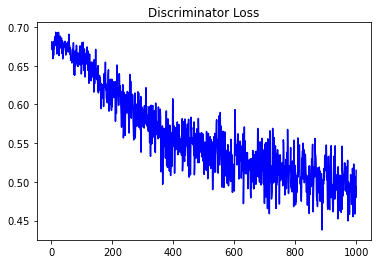

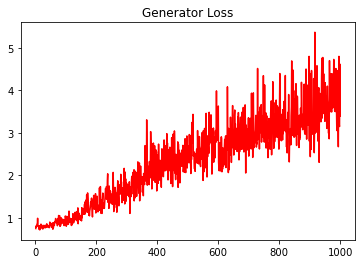

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.24263604081929752


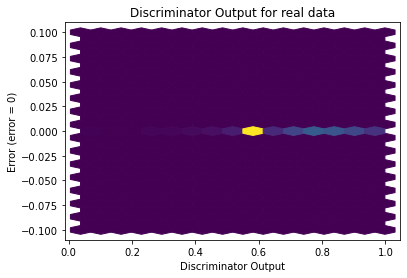

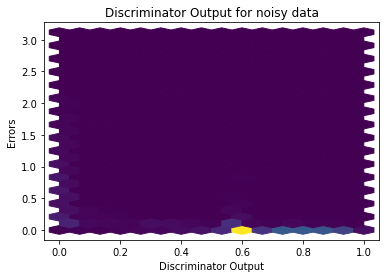

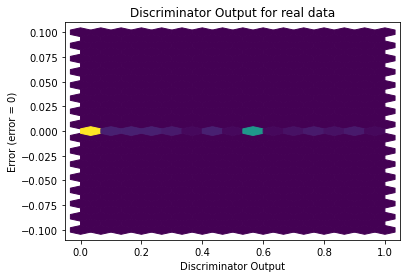

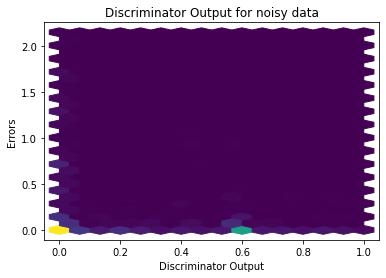

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())